Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


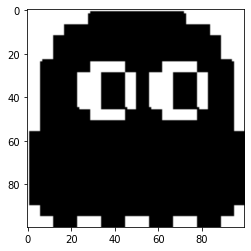

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


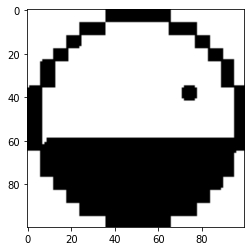

In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Set the threshold value
threshold = 180

path = os.getcwd()

path_train = path + '/ghost_Train.jpg'
path_test  = path + '/pacman_Test1.jpg'

def read_binarize_img(path_img):
    
    # Read the image
    img_train = Image.open(path_img).convert(mode="L")
    img_train = img_train.resize(size=(100,100))
    
    # Binarize the image
    img_train_array = np.asarray(img_train,dtype=np.uint8)
    x = np.zeros(img_train_array.shape,dtype=np.float)
    x[img_train_array > threshold] = 1
    x[x==0] = -1
    
    return x


# Read images
x = read_binarize_img(path_train)
y = read_binarize_img(path_test)

# Plot images
plt.imshow(np.repeat(x[:,:,np.newaxis], repeats=3, axis=2))
plt.show()
plt.imshow(np.repeat(y[:,:,np.newaxis], repeats=3, axis=2))
plt.show()


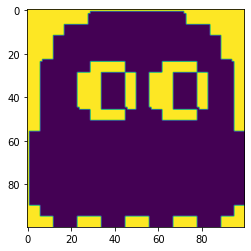

In [2]:
plt.imshow(x)

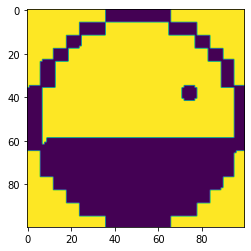

In [3]:
plt.imshow(y)

# Create the weights matrix

In [4]:
x_reshape=x.reshape((x.shape[0]**2,1))
weight=x_reshape @ x_reshape.T-np.eye(x_reshape.shape[0])
weight

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [5]:
np.unique(weight)

array([-1.,  0.,  1.])

# Reshaping Test input

In [6]:
y_reshape=y.reshape((y.shape[0]**2,1))
print(y_reshape.shape)

(10000, 1)


In [7]:
np.unique(y_reshape)

array([-1.,  1.])

# Define activation

In [8]:
def activation(num,teta=0):
  if num > teta :
    return 1
  elif num < teta :
    return -1 
  else :
    return num 

 # Updating process matrix until convergence

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Converged after 1 round


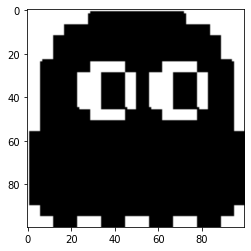

In [9]:
import random

def update_process(X,Y,W):
  Y_per_epoch=X.copy()
  Y_new=Y.copy()
  converged=False
  count=0
  #plt.imshow(Y.reshape((100,100)))
  while converged==False :
    random_index=random.sample(range(0,Y.shape[0]),Y.shape[0])
    count+=1
    for index in random_index:
      Y_new[index]=activation(X[index]+ Y_new.T @ W[:,index])

    Y_per_epoch=np.hstack((Y_per_epoch,Y_new))
    plt.imshow(np.repeat(Y_per_epoch[:,count].reshape((100,100))[:,:,np.newaxis], repeats=3, axis=2))
    if count==1 :
      if np.sum((Y_new==X).astype('int'))==X.shape[0]:
        converged= True
    else : 
      if np.sum((Y_per_epoch[:,count]==Y_per_epoch[:,count-1]).astype('int'))==X.shape[0]:
        converged= True
  print(f"Converged after {count} round")
  return Y_per_epoch[:,count].reshape((Y.shape[0],1))

new_y=update_process(x_reshape,y_reshape,weight)

 # Updating process matrix for a limited number of epochs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


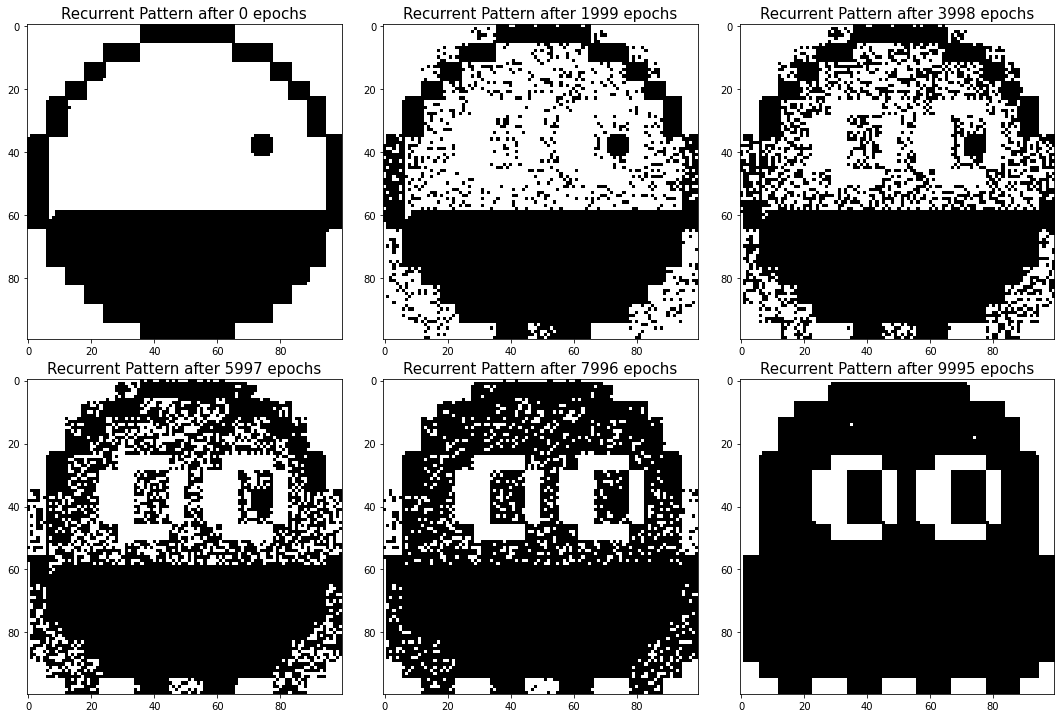

In [10]:
import random
fig,ax=plt.subplots(2,3,figsize=(15,10))
def update_process(X,Y,W):
  Y_per_epoch=X.copy()
  Y_new=Y.copy()
  #converged=False
  count=0
  #plt.imshow(Y.reshape((100,100)))
  #for i in range(1000):
  random_index=random.sample(range(0,Y.shape[0]),Y.shape[0])
  for index in random_index:
    Y_new[index]=activation(X[index]+ Y_new.T @ W[:,index])
    if count%1999==0:
      ax[int((count/1999)/3),int((count/1999))%3].imshow(np.repeat(Y_new.reshape((100,100))[:,:,np.newaxis], repeats=3, axis=2));
      ax[int((count/1999)/3),int((count/1999))%3].set_title(f"Recurrent Pattern after {count} epochs",size=15);
    count+=1
  return Y_new
plt.tight_layout()
new_y=update_process(x_reshape,y_reshape,weight)